In [1]:
import numpy as np

# Plots

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Polynomial Interpolation
* Lagrange polynomial
* Newton polynomia

## Lagrange polynomial

Given a distinct (no two $x_{j}$ are the same) set of $n + 1$ data points
$$(x_{0},y_{0}),\ldots ,(x_{j},y_{j}),\ldots ,(x_{n},y_{n}),$$

the interpolation polynomial in the Lagrange form is a linear combination

$$L(x):=\sum _{j=0}^{n}y_{j}L_{j}(x)$$
of Lagrange basis polynomials

$$L_{j}(x):=\prod _{\begin{smallmatrix}0\leq m\leq n\\m\neq j\end{smallmatrix}}{\frac {x-x_{m}}{x_{j}-x_{m}}}={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{n})}{(x_{j}-x_{n})}},$$
where $0\leq j\leq n$.

In [2]:
def poly_lagrange_coeff (x ,i , xn ):
    n=len(xn)-1
    Lj=1
    for j in range ( n+1 ):
        if i!=j:
            Lj*=( x-xn[j])/( xn[i]-xn[j])
    return Lj

In [3]:
def lagrange_polynomial (x , xn , yn ):
    # x: point x for $L(x)$ 
    # xn: xn data points
    # yn: yn data points
    
    n=len( xn )-1
    lagrpoly = np.array ([ poly_lagrange_coeff (x ,i , xn ) for i in range (n+1)])
    L = np.dot( yn , lagrpoly )
    return L

In [4]:
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
x = np.linspace( 0 , 7 ,100)
y= lagrange_polynomial ( x , xn , yn )

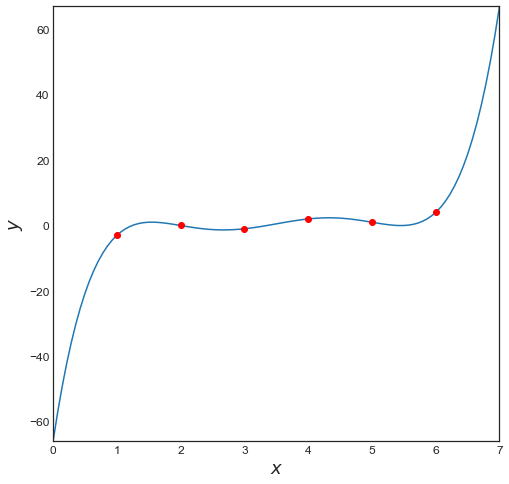

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), sharex = False)
_ = ax.plot(x,y,xn,yn,'ro')
_ = ax.set_xlabel('$x$', fontsize=18)
_ = ax.set_ylabel('$y$', fontsize=18)
_ = ax.set_xlim([min(x),max(x)])
_ = ax.set_ylim([min(y),max(y)])

## Newton Polynomial

Given a distinct (no two $x_{j}$ are the same) set of $n + 1$ data points
$$(x_{0},y_{0}),\ldots ,(x_{j},y_{j}),\ldots ,(x_{n},y_{n}),$$

The forward divided differences are defined as:

$$[y_{k }]:=y_{k },\qquad k \in \{0,\ldots ,k\}$$
$$[y_{k },\ldots ,y_{{k +j}}]:={\frac  {[y_{{k +1}},\ldots ,y_{{k +j}}]-[y_{{k }},\ldots ,y_{{k +j-1}}]}{x_{{k +j}}-x_{k }}},\qquad k \in \{0,\ldots ,k-j\},\ j\in \{1,\ldots ,k\}.$$

$$N(x):=\sum _{{j=0}}^{{k}}a_{{j}}n_{{j}}(x)$$
with the Newton basis polynomials defined as

$$n_{j}(x):=\prod _{{i=0}}^{{j-1}}(x-x_{i})$$
for $j > 0$ and $n_{0}(x)\equiv 1$.

The coefficients are defined as
$$a_{j}:=[y_{0},\ldots ,y_{j}]$$

In [6]:
def poly_newton_coeff(xn,yn):
    # xn: xm data points
    # yn: ym data points
    n = len(xn)
    #Construct table and load xy pairs in first columns
    A = np.zeros((n,n+1))
    A[:,0]= xn[:]
    A[:,1]= yn[:]
    #Fill in Divided differences
    for j in range(2,n+1):
        for i in range(j-1,n):
            A[i,j] = (A[i,j-1]-A[i-1,j-1]) / (A[i,0]-A[i-j+1,0])
    #Copy diagonal elements into array for returning
    a = np.zeros(n)
    for k in range(0,n):
        a[k] = A[k,k+1]
    return a

In [7]:
def newton_polynomial(x, xn, yn):
    # xn: data points at x
    # yn: data points at y
    # x: evaluation point(s)
    
    n = len(xn)
    # coefficients
    a = poly_newton_coeff(xn, yn)
    p = a[n-1]
    for i in range(n-2,-1,-1):
        p = p*(x-xn[i]) + a[i]
    return p

In [8]:
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
x = np.linspace( 0 , 7 ,100)
y=newton_polynomial ( x , xn , yn )

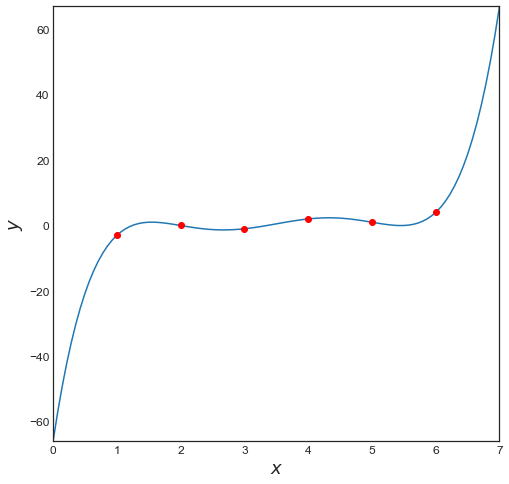

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), sharex = False)
_ = ax.plot(x,y,xn,yn,'ro')
_ = ax.set_xlabel('$x$', fontsize=18)
_ = ax.set_ylabel('$y$', fontsize=18)
_ = ax.set_xlim([min(x),max(x)])
_ = ax.set_ylim([min(y),max(y)])

***